<a href="https://colab.research.google.com/github/aedwardscintron/NGG6050/blob/main/Multiple_Comparisons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Concepts/Python/Multiple%20Comparisons.ipynb)

# Definitions

The multiple comparisons problem in statistics occurs when multiple statistical inferences are done simultaneously, which greatly increases the probability that any one inference will yield an erroneous result, by chance. A lot has been written about this problem, including:

- [Its prevalence in fMRI data analysis](https://www.sciencedirect.com/science/article/pii/S1053811912007057?via%3Dihub) (including a compelling illustration by this [prizewinning study](https://blogs.scientificamerican.com/scicurious-brain/ignobel-prize-in-neuroscience-the-dead-salmon-study/)\)

- [How Baysian methods can avoid the problem](http://www.stat.columbia.edu/~gelman/research/published/multiple2f.pdf).

- [General approaches for correcting for multiple comparisons](http://www.biostathandbook.com/multiplecomparisons.html).

Here we will provide some intuition for the problem using a simple thought experiment, to sensitize you to how much of a problem it can be. Consider performing the same statistical test on *N* different samples corresponding to, say, different voxels in fMRI data, using a *p*-value of $\alpha$ (typically 0.05) for each test.

Thus, for any one test, the probability of getting a Type I error (rejecting $H_0$ when $H_0$ is true) is $\alpha$:

$p_{error}=\alpha$

For two tests, the probably of getting a Type I error for either test is just one minus the combined probability of not getting a Type I error from either one:

$p_{error}=1-(1-\alpha)(1-\alpha)$

For *N* tests, the probably of getting a Type I error for either test is just one minus the combined probability of not getting a Type I error from any one:

$p_{error}=1-(1-\alpha)^N$

Run the cell below to see that the probability of getting a Type I error under these conditions grows rapidly with *N*, implying that it becomes very, very likely that you will get a "statistically significant result" just by chance if you do enough tests:

Text(0, 0.5, '$P_{error}$')

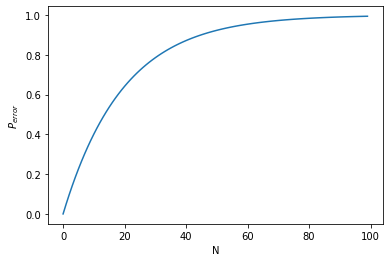

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

alpha = 0.05
N = np.arange(0,100)
plt.plot(N, 1-(1-alpha)**N)
plt.xlabel('N')
plt.ylabel('$P_{error}$')

# Correcting for multiple comparisons



There are a number of different methods that can be used to [correct for this problem](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5506159/). Below are two common methods.




## Bonferroni correction

The simplest way to correct for Type I errors (false positives) in multiple comparisons is to divide $\alpha$ by the number of comparisons, known as the [Bonferroni correction](https://mathworld.wolfram.com/BonferroniCorrection.html). This is a very conservative test that is typically used when the number of comparisons is relatively small and you want to avoid Type I errors.

## Benjamini–Hochberg procedure


Another approach is to more carefully control the false-discovery rate using the [Benjamini–Hochberg procedure](https://www.jstor.org/stable/2346101?seq=1#metadata_info_tab_contents):

1\. Rank the individual *p*-values in ascending order, labeled *i*=1...*n*

2\. For each *p*-value, calculate its "critical value" as (*i*/*n*)*Q*, where *i* is the rank, *n* is the total number of tests, and *Q* is the false discovery rate (a percentage) that you choose (typically 0.05).

3\. In your rank-ordered, original *p*-values, find the largest value that is smaller than its associated critical value; this *p*-value is the new criterion (i.e., reject $H_0$ for all cases for which *p* ≤ this value).

# Exercise

In this exercise we will run through an example of correcting for multiple comparisons with both the Benjamini-Hochberg procedure and the more conservative Bonferroni correction.

First, simulate multiple (say, 1000) t-tests comparing two samples with equal means and standard deviations, and save the p-values. Obviously, at p<0.05 we expect that ~5% of the simulations to yield a "statistically significant" result (of rejecting the NULL hypothesis that the samples come from distributions with equal means).

Second, once you have the simulated p-values, apply both methods to address the multiple comparisons problem.

Third, set the sample 1 and sample 2 means to be 1 and 2 respectively, and re-run the exercise. What do you notice? What if you make the difference between means even greater?

Total tests: 1000
Significant results (p < 0.05): 41
Proportion of significant results: 0.041


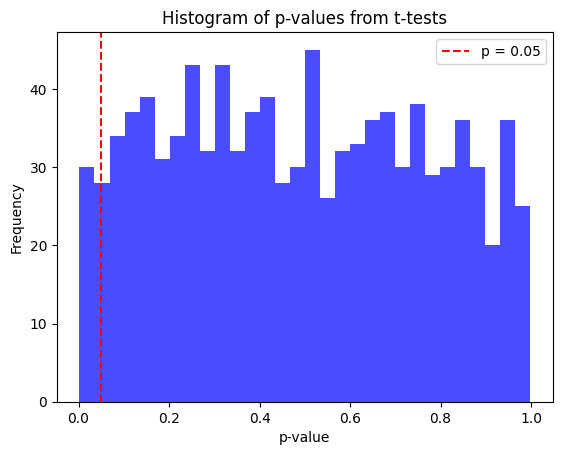

In [ ]:
#First, simulate multiple (say, 1000) t-tests comparing two samples with equal means and standard deviations,
#and save the p-values. Obviously, at p<0.05 we expect that ~5% of the simulations to yield a "statistically significant"
#result (of rejecting the NULL hypothesis that the samples come from distributions with equal means)


import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_tests = 1000
sample_size = 30  # Size of each sample
true_mean = 0     # True mean of the distributions
true_std = 1      # True standard deviation of the distributions

# Store p-values
p_values = []

for _ in range(num_tests):
    # Generate two samples from normal distributions with equal means and std devs
    sample1 = np.random.normal(true_mean, true_std, sample_size)
    sample2 = np.random.normal(true_mean, true_std, sample_size)

    # Perform a t-test
    t_stat, p_value = stats.ttest_ind(sample1, sample2)
    p_values.append(p_value)

# Convert p-values to a numpy array for easy processing
p_values = np.array(p_values)

# Calculate the proportion of significant results
significant_results = np.sum(p_values < 0.05)
proportion_significant = significant_results / num_tests

# Output results
print(f"Total tests: {num_tests}")
print(f"Significant results (p < 0.05): {significant_results}")
print(f"Proportion of significant results: {proportion_significant:.3f}")

# Plot histogram of p-values
plt.hist(p_values, bins=30, alpha=0.7, color='blue')
plt.axvline(0.05, color='red', linestyle='--', label='p = 0.05')
plt.title('Histogram of p-values from t-tests')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()
plt.show()



In [ ]:

#Bonferroni
#To apply Bonferroni, we need to adjust the significance level by dividing it by the number of tests performed
#for alpha = 0.05, adjusted significance for 1000 tests would be 0.05/1000
#Adjusted alpha = 0.00005


# Convert p-values to a numpy array for easy processing
p_values = np.array(p_values)

# Calculate the proportion of significant results using Bonferroni correction
alpha_adjusted = 0.05 / num_tests
significant_results_bonferroni = np.sum(p_values < alpha_adjusted)
proportion_significant_bonferroni = significant_results_bonferroni / num_tests

# Output results
print(f"Total tests: {num_tests}")
print(f"Significant results (Bonferroni correction, p < {alpha_adjusted:.5f}): {significant_results_bonferroni}")
print(f"Proportion of significant results (Bonferroni): {proportion_significant_bonferroni:.3f}")



for _ in range(num_tests):
    # Generate two samples from normal distributions with equal means and std devs
    sample1 = np.random.normal(true_mean, true_std, sample_size)
    sample2 = np.random.normal(true_mean, true_std, sample_size)

    # Perform a t-test
    t_stat, p_value = stats.ttest_ind(sample1, sample2)

# Convert p-values to a numpy array for easy processing
p_values = np.array(p_values)



Total tests: 1000
Significant results (Bonferroni correction, p < 0.00005): 0
Proportion of significant results (Bonferroni): 0.000


In [ ]:
#Apply the Benjamini-Hochberg procedure
sorted_indices = np.argsort(p_values)
sorted_p_values = p_values[sorted_indices]
m = len(p_values)

# Calculate adjusted p-values
adjusted_p_values = (sorted_p_values * m) / (np.arange(1, m + 1))

# Find the maximum p-value that is less than or equal to alpha
alpha = 0.05
significant_results_bh = np.sum(adjusted_p_values <= alpha)
proportion_significant_bh = significant_results_bh / num_tests


# Output results
print(f"Total tests: {num_tests}")
print(f"Significant results (Benjamini-Hochberg, p < {alpha}): {significant_results_bh}")
print(f"Proportion of significant results (Benjamini-Hochberg): {proportion_significant_bh:.3f}")


Total tests: 1000
Significant results (Benjamini-Hochberg, p < 0.05): 0
Proportion of significant results (Benjamini-Hochberg): 0.000


Results for means 1 and 2:
  Total tests: 1000
  Significantly significant results (p < 0.05): 960 (96.00%)
  Bonferroni corrected significant results: 335 (33.50%)
  Holm corrected significant results: 380 (38.00%)



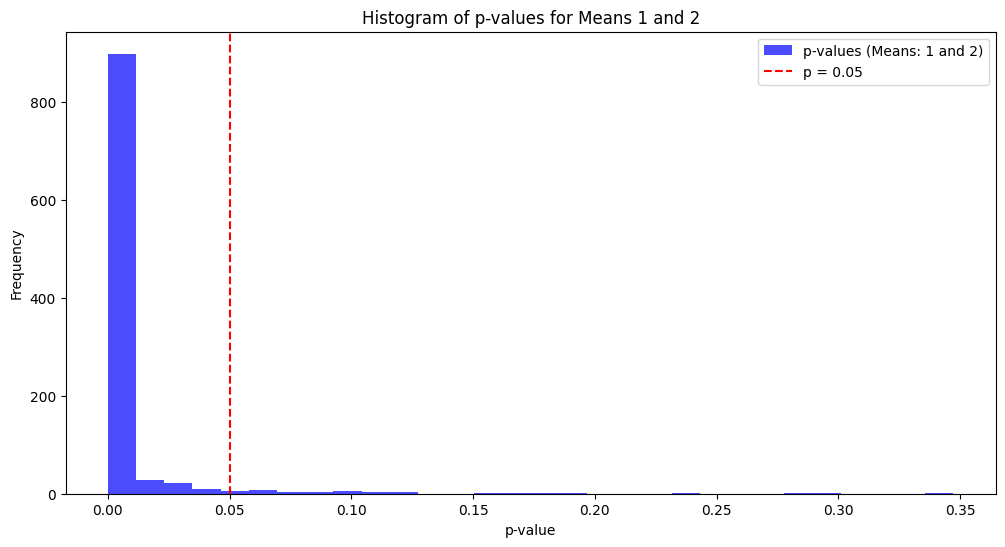

Results for means 1 and 4:
  Total tests: 1000
  Significantly significant results (p < 0.05): 1000 (100.00%)
  Bonferroni corrected significant results: 1000 (100.00%)
  Holm corrected significant results: 1000 (100.00%)



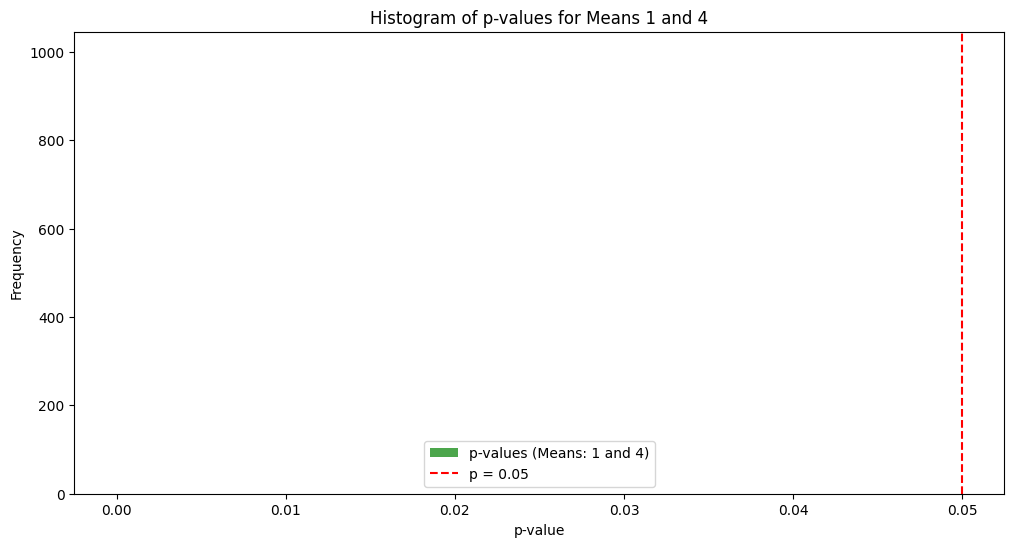

In [ ]:

# Parameters
num_tests = 1000
std_dev = 1.0
sample_size = 30

# Set means for the first simulation
mean1 = 1
mean2 = 2
p_values_unequal = simulate_t_tests(num_tests, mean1, mean2, std_dev, sample_size)

# Apply corrections
bonferroni_unequal, holm_unequal = apply_multiple_comparisons_corrections(p_values_unequal)

# Results for means 1 and 2
def print_results(p_values, bonferroni, holm, mean1, mean2):
    sig_count = np.sum(np.array(p_values) < 0.05)
    sig_bonferroni = np.sum(bonferroni < 0.05)
    sig_holm = np.sum(holm < 0.05)

    print(f"Results for means {mean1} and {mean2}:")
    print(f"  Total tests: {len(p_values)}")
    print(f"  Significantly significant results (p < 0.05): {sig_count} ({sig_count/len(p_values)*100:.2f}%)")
    print(f"  Bonferroni corrected significant results: {sig_bonferroni} ({sig_bonferroni/len(p_values)*100:.2f}%)")
    print(f"  Holm corrected significant results: {sig_holm} ({sig_holm/len(p_values)*100:.2f}%)\n")

print_results(p_values_unequal, bonferroni_unequal, holm_unequal, mean1, mean2)

# Plot histogram for the first set of means
plt.figure(figsize=(12, 6))
plt.hist(p_values_unequal, bins=30, alpha=0.7, color='blue', label='p-values (Means: 1 and 2)')
plt.axvline(0.05, color='red', linestyle='--', label='p = 0.05')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.title('Histogram of p-values for Means 1 and 2')
plt.legend()
plt.show()

# Increase the difference between means
mean1_greater = 1
mean2_greater = 4
p_values_greater = simulate_t_tests(num_tests, mean1_greater, mean2_greater, std_dev, sample_size)
bonferroni_greater, holm_greater = apply_multiple_comparisons_corrections(p_values_greater)

print_results(p_values_greater, bonferroni_greater, holm_greater, mean1_greater, mean2_greater)

# Plot histogram for the greater difference in means
plt.figure(figsize=(12, 6))
plt.hist(p_values_greater, bins=30, alpha=0.7, color='green', label='p-values (Means: 1 and 4)')
plt.axvline(0.05, color='red', linestyle='--', label='p = 0.05')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.title('Histogram of p-values for Means 1 and 4')
plt.legend()
plt.show()


# Additional Resources


How to correct for multiple comparisons in [Matlab](https://www.mathworks.com/help/stats/multcompare.html), [R](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/p.adjust.html), and [Python](https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html)

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania